In [1]:
import torch
import itk, itkwidgets
import nibabel as nib
import numpy as np
import pandas as pd
from lib.utils import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [2]:
def plot_single_image(img):    
    def explore_3dimage(depth):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 1, 1)
        plt.imshow(np.expand_dims(img.get_fdata(), axis=3)[:, :, depth, :], cmap='gray')
        plt.title("MRI")
        plt.axis('off')

    interact(explore_3dimage, depth=(0, img.shape[2] - 1));

In [3]:
df = pd.read_csv("NFBS_Dataset_meta.csv")

In [4]:
skull, brain, mask = df.iloc[0]

In [5]:
img = np.expand_dims(nib.load(skull).get_fdata(), axis=3)

In [6]:
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

In [7]:
h = IntensityNormalization()(img)

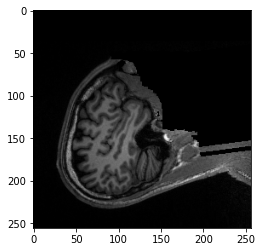

In [8]:
plt.imshow(h[:, :, 52, :], cmap='gray')

In [9]:

h = image_histogram_equalization(h)

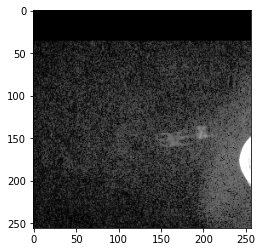

In [11]:
plt.imshow(h[:, :, 0, :], cmap='gray')

In [13]:
def plot_single_image(img):
    # img = nib.load(img).get_fdata()
    
    def explore_3dimage(depth):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 1, 1)
        plt.imshow(img[:, :, depth, :], cmap='gray')
        plt.title("MRI")
        plt.axis('off')

    interact(explore_3dimage, depth=(0, img.shape[2] - 1));

In [14]:
plot_single_image(h)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…